In [ ]:
#pip install --upgrade anndata==0.8.0

In [ ]:
#pip install --upgrade scanpy==1.9.1

In [ ]:
conda install -c bioconda anndata2ri

In [1]:
import scanpy as sc

import pandas as pd
import numpy as np

from collections import Counter

import numpy as np
import scipy as sp
import scanpy as sc
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import rc
from matplotlib import colors
import seaborn as sb
from itertools import compress
import random
import joblib as jl
import matplotlib.patches as mpatches

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
# import anndata2ri
# import rpy2.rinterface_lib.callbacks
# import logging

In [ ]:
#anndata2ri.activate()

In [ ]:
#%load_ext rpy2.ipython

In [ ]:
print('Versions of core packages in use:')
sc.logging.print_header()

In [ ]:
import platform
print(platform.python_version())

# Read in the dataset 

In [4]:
skull_metadata= pd.read_excel("/home/jovyan//mount/gdrive/skull_metadata_kenTo.xlsx")

In [ ]:
skull_metadata

In [ ]:
#skull= sc.read_h5ad("/lustre/scratch117/cellgen/team205/sharedData/kt21/skeletal/preannotation_embedded_matrix.h5ad")

In [5]:
skull= sc.read_h5ad("/home/jovyan/mount/gdrive/preannotation_embedded_matrix.h5ad")

In [6]:
skull

AnnData object with n_obs × n_vars = 447018 × 4077
    obs: 'run_id', 'batch', 'relative_position', 'bone', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'anatomical_site', 'pcw', 'brc_code', 'percent_mito', 'percent_ribo', 'n_counts', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'QC', 'S_score', 'G2M_score', 'phase', 'leiden', 'compartment', 'merged'
    var: 'gene_ids', 'n_cells', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'anatomical_site_colors', 'brc_code_colors', 'compartment_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'pcw_colors', 'rank_genes_groups', 'run_id_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [15]:
skull_with_pca_leiden= skull.copy()

AnnData object with n_obs × n_vars = 447018 × 4077
    obs: 'run_id', 'batch', 'relative_position', 'bone', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'anatomical_site', 'pcw', 'brc_code', 'percent_mito', 'percent_ribo', 'n_counts', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'QC', 'S_score', 'G2M_score', 'phase', 'leiden', 'compartment', 'merged'
    var: 'gene_ids', 'n_cells', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'anatomical_site_colors', 'brc_code_colors', 'compartment_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'pcw_colors', 'rank_genes_groups', 'run_id_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [ ]:
skull = sc.AnnData(skull.raw.X,obs=skull.obs,var=skull.raw.var)

In [16]:
skull

AnnData object with n_obs × n_vars = 447018 × 35118
    obs: 'run_id', 'batch', 'relative_position', 'bone', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'anatomical_site', 'pcw', 'brc_code', 'percent_mito', 'percent_ribo', 'n_counts', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'QC', 'S_score', 'G2M_score', 'phase', 'leiden', 'compartment', 'merged'
    var: 'gene_ids', 'n_cells', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'

In [17]:
skull.obs['anatomical_site'].value_counts()

skullbase    116566
knee         109694
shoulder      79626
hip           75365
calvaria      65767
Name: anatomical_site, dtype: int64

In [18]:
hip_knee= skull[skull.obs['anatomical_site'].isin(['knee', 'hip'])]

In [19]:
hip_knee

View of AnnData object with n_obs × n_vars = 185059 × 35118
    obs: 'run_id', 'batch', 'relative_position', 'bone', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'anatomical_site', 'pcw', 'brc_code', 'percent_mito', 'percent_ribo', 'n_counts', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'QC', 'S_score', 'G2M_score', 'phase', 'leiden', 'compartment', 'merged'
    var: 'gene_ids', 'n_cells', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'

In [20]:
sc.pp.normalize_total(hip_knee, target_sum=1e4)

sc.pp.log1p(hip_knee)

sc.tl.pca(hip_knee, svd_solver='arpack')

sc.pp.neighbors(hip_knee, n_neighbors=10, n_pcs=40)

sc.tl.paga(hip_knee)
sc.pl.paga(hip_knee, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(hip_knee, init_pos='paga')
sc.tl.umap(hip_knee)


/home/jovyan/my-conda-envs/WE/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [21]:
hip_knee

AnnData object with n_obs × n_vars = 185059 × 35118
    obs: 'run_id', 'batch', 'relative_position', 'bone', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'anatomical_site', 'pcw', 'brc_code', 'percent_mito', 'percent_ribo', 'n_counts', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'QC', 'S_score', 'G2M_score', 'phase', 'leiden', 'compartment', 'merged'
    var: 'gene_ids', 'n_cells', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'pca', 'neighbors', 'paga', 'leiden_sizes', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [22]:
sc.tl.leiden(hip_knee, resolution=6, key_added= "leiden_6")

In [25]:
sc.tl.leiden(hip_knee, resolution=2, key_added= "leiden_6")

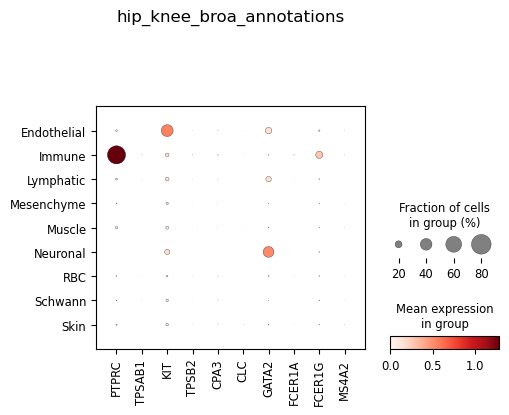

In [51]:
sc.pl.dotplot(hip_knee, ['PTPRC', 'TPSAB1', 'KIT', "TPSB2", "CPA3", "CLC", "GATA2", "FCER1A", "FCER1G", 'MS4A2'], "compartment", dendrogram=False, use_raw=False, title= "hip_knee_broa_annotations",
             save= "hip_knee_broa_annotations.png")

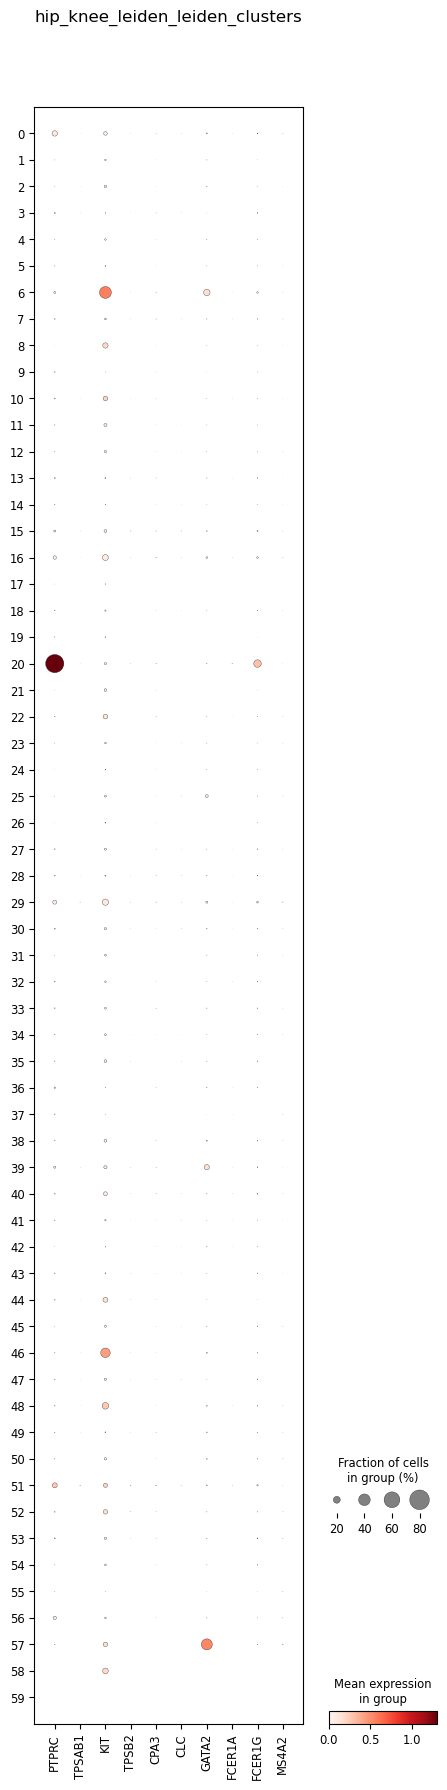

In [50]:
sc.pl.dotplot(hip_knee, ['PTPRC', 'TPSAB1', 'KIT', "TPSB2", "CPA3", "CLC", "GATA2", "FCER1A", "FCER1G", 'MS4A2'], "leiden_6", dendrogram=False, use_raw=False, title= "hip_knee_leiden_leiden_clusters", 
             save="hip_knee_leiden_leiden_clusters.png" )

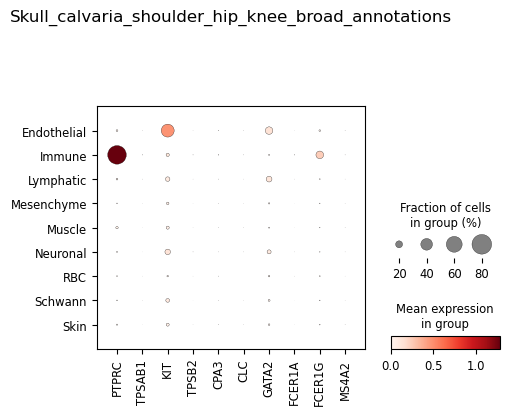

In [49]:
sc.pl.dotplot(skull, ['PTPRC', 'TPSAB1', 'KIT', "TPSB2", "CPA3", "CLC", "GATA2", "FCER1A", "FCER1G", 'MS4A2'], "compartment", dendrogram=False, use_raw=False, 
             title="Skull_calvaria_shoulder_hip_knee_broad_annotations", save= "Skull_calvaria_shoulder_hip_knee_broad_annotations.png")

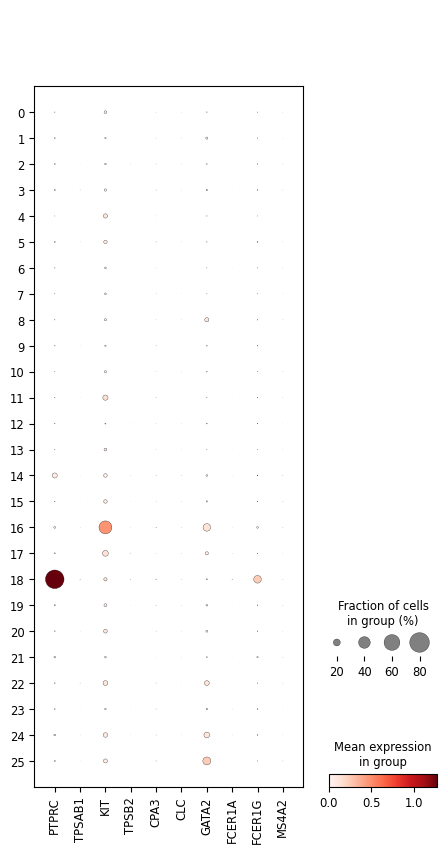

In [28]:
sc.pl.dotplot(skull, ['PTPRC', 'TPSAB1', 'KIT', "TPSB2", "CPA3", "CLC", "GATA2", "FCER1A", "FCER1G", 'MS4A2'], "leiden", dendrogram=False, use_raw=False)

In [29]:
skull.obsm['X_umap'] = skull_with_pca_leiden.obsm["X_umap"]


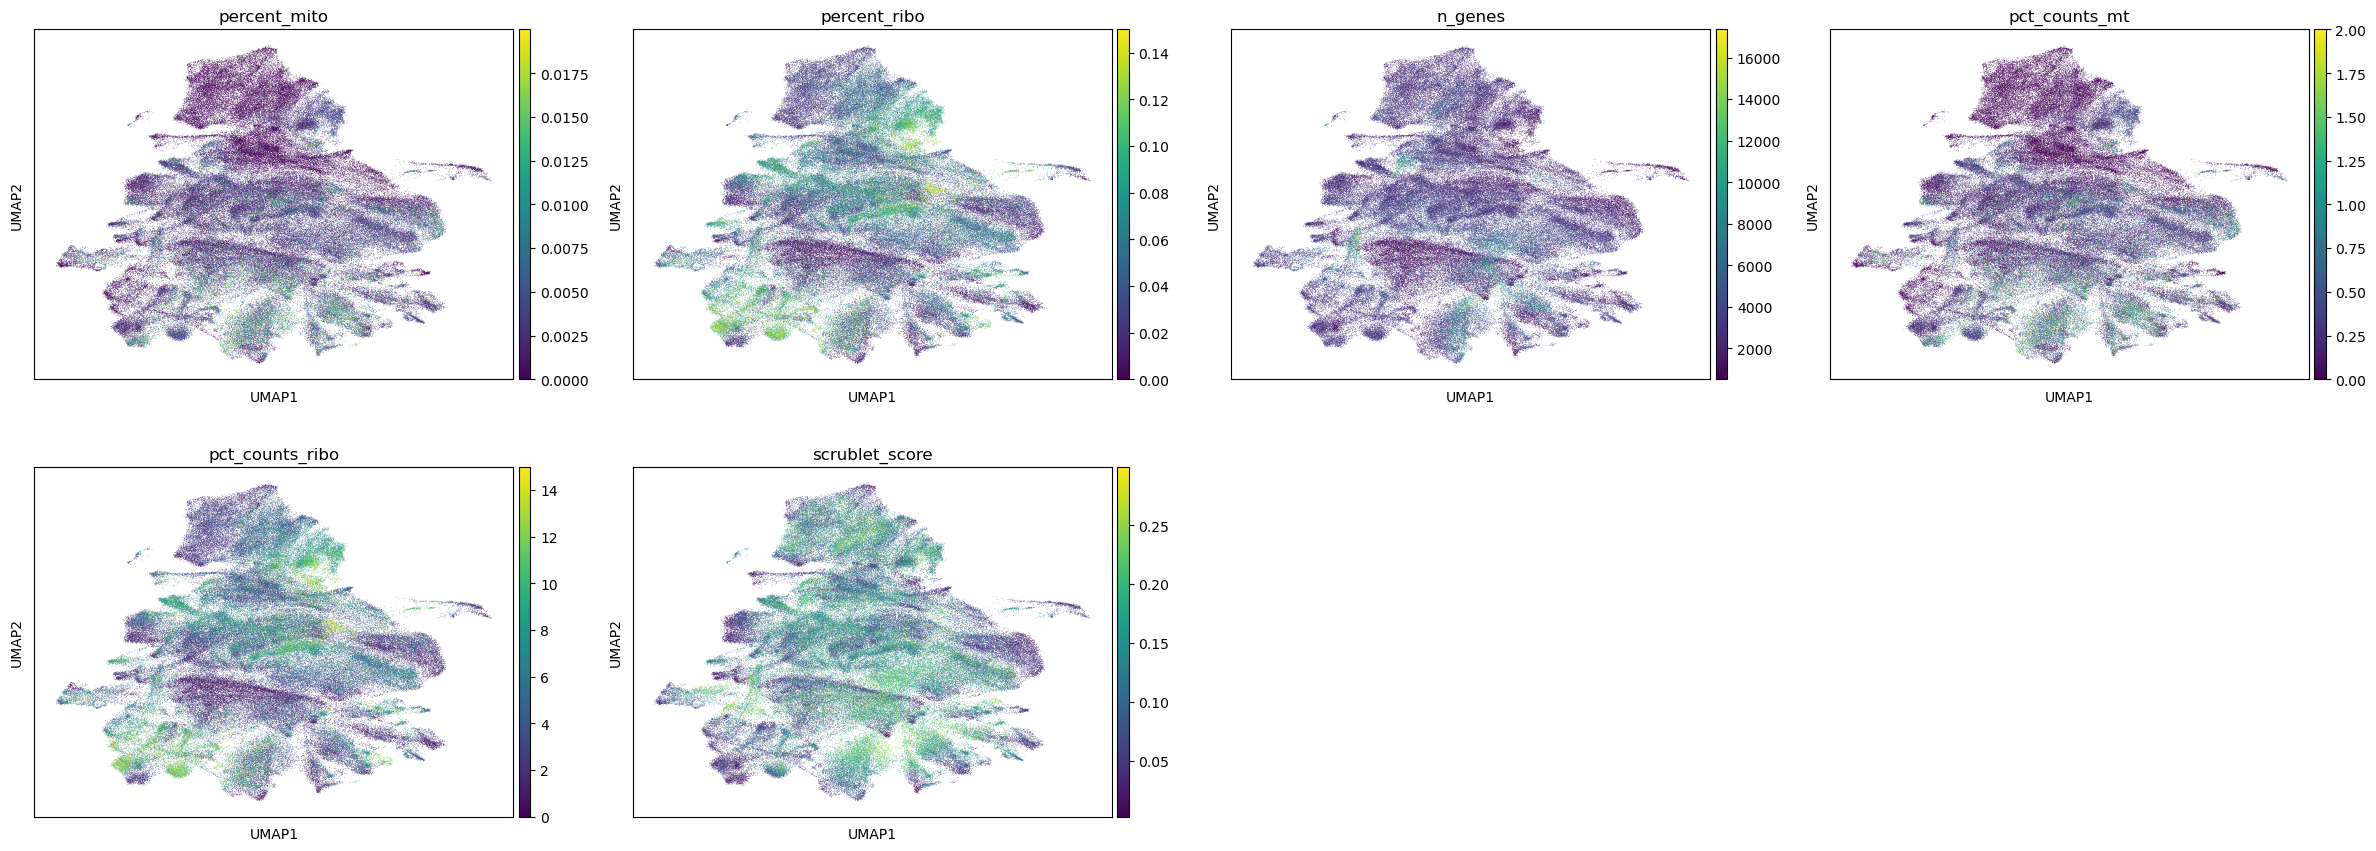

In [30]:
sc.pl.umap(hip_knee, color=['percent_mito','percent_ribo','n_genes' ,'pct_counts_mt','pct_counts_ribo','scrublet_score'])

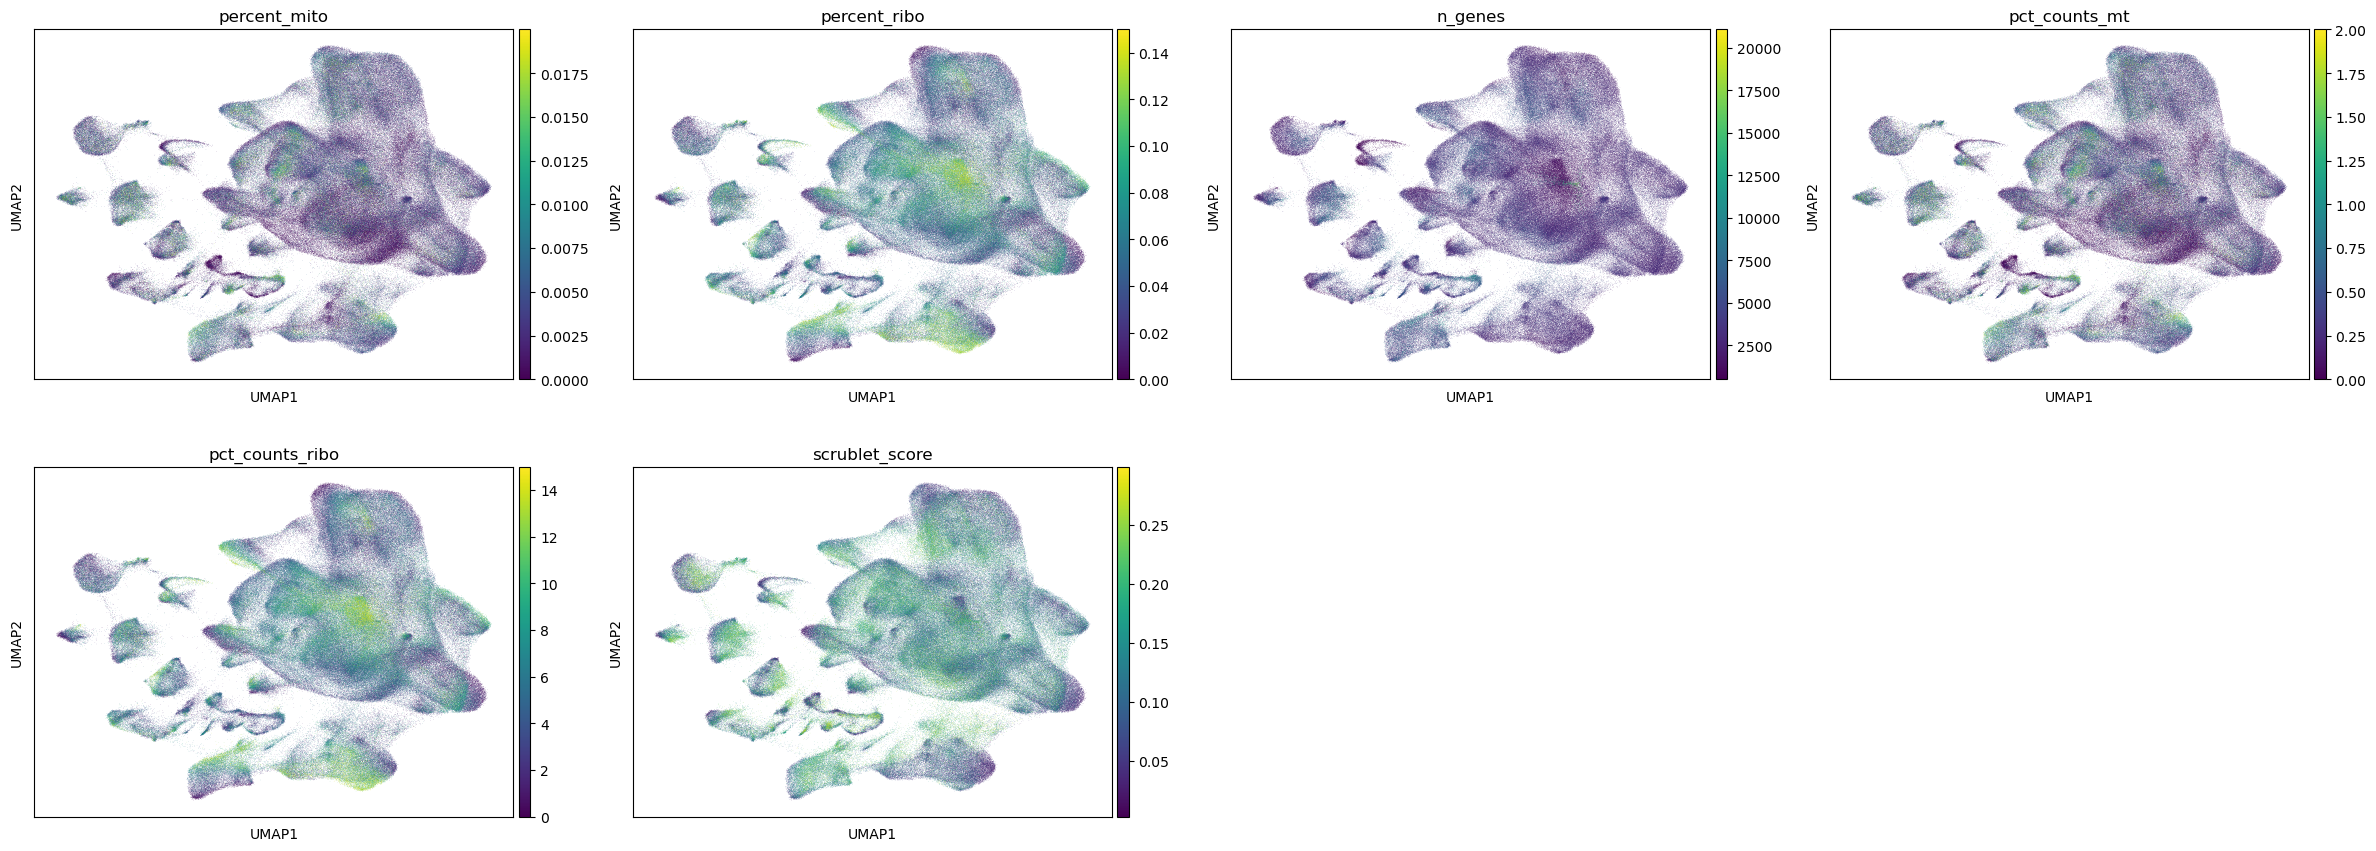

In [31]:
sc.pl.umap(skull, color=['percent_mito','percent_ribo','n_genes' ,'pct_counts_mt','pct_counts_ribo','scrublet_score'])

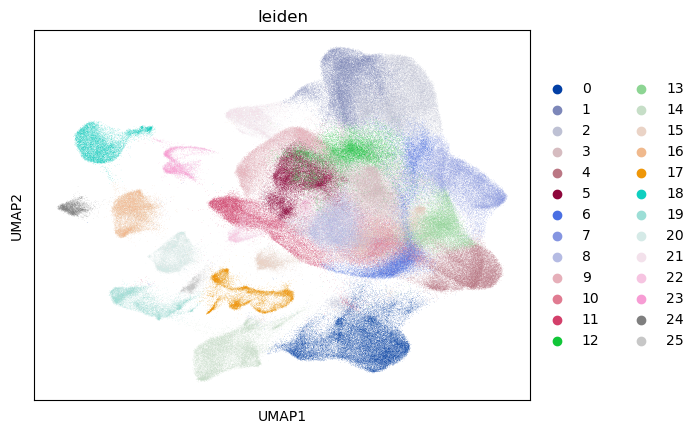

In [32]:
sc.pl.umap(skull, color=['leiden'])

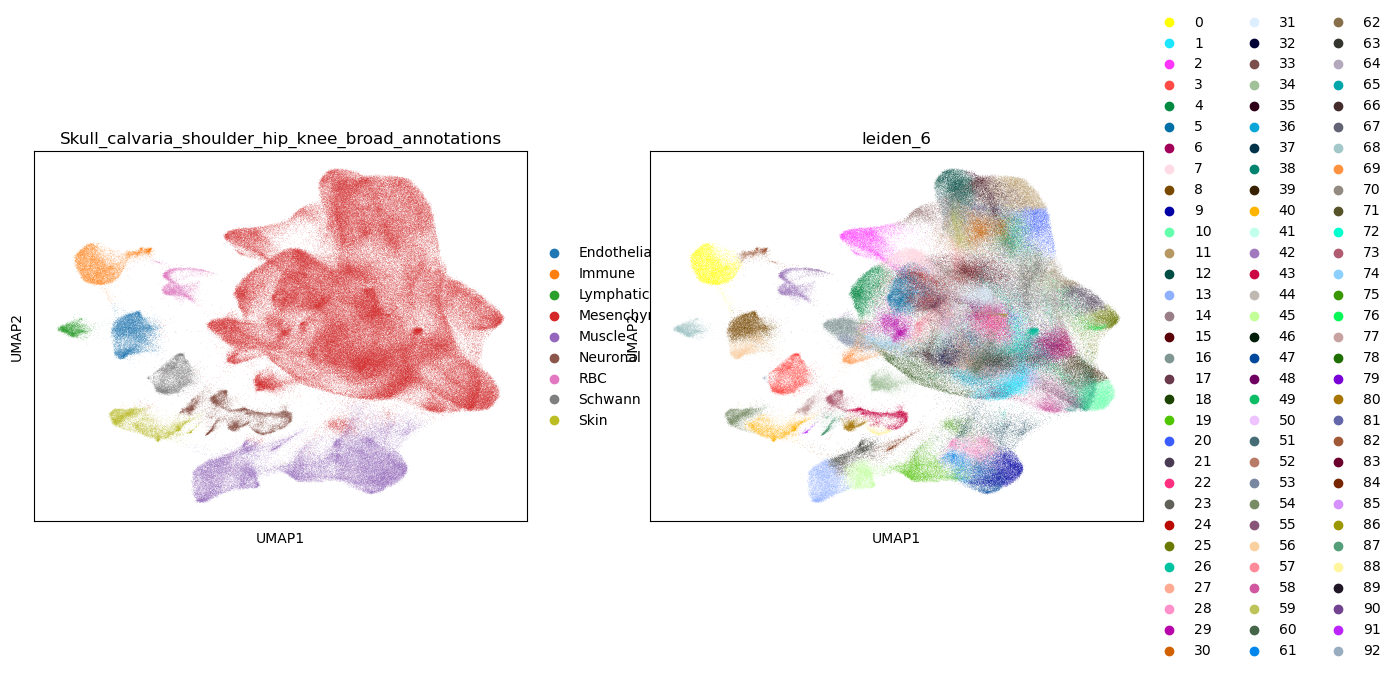

In [54]:
sc.pl.umap(skull, color=['compartment', "leiden_6"], title= "Skull_calvaria_shoulder_hip_knee_broad_annotations", save= "Skull_calvaria_shoulder_hip_knee_leiden_clusters_umap.png")

In [ ]:
sc.tl.leiden(skull_with_pca_leiden, resolution=6, key_added= "leiden_6")

In [36]:
skull_with_pca_leiden

AnnData object with n_obs × n_vars = 447018 × 4077
    obs: 'run_id', 'batch', 'relative_position', 'bone', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'anatomical_site', 'pcw', 'brc_code', 'percent_mito', 'percent_ribo', 'n_counts', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'QC', 'S_score', 'G2M_score', 'phase', 'leiden', 'compartment', 'merged', 'leiden_6'
    var: 'gene_ids', 'n_cells', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'anatomical_site_colors', 'brc_code_colors', 'compartment_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'pcw_colors', 'rank_genes_groups', 'run_id_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 

In [39]:
skull.obs['leiden_6'] = skull_with_pca_leiden.obs["leiden_6"]


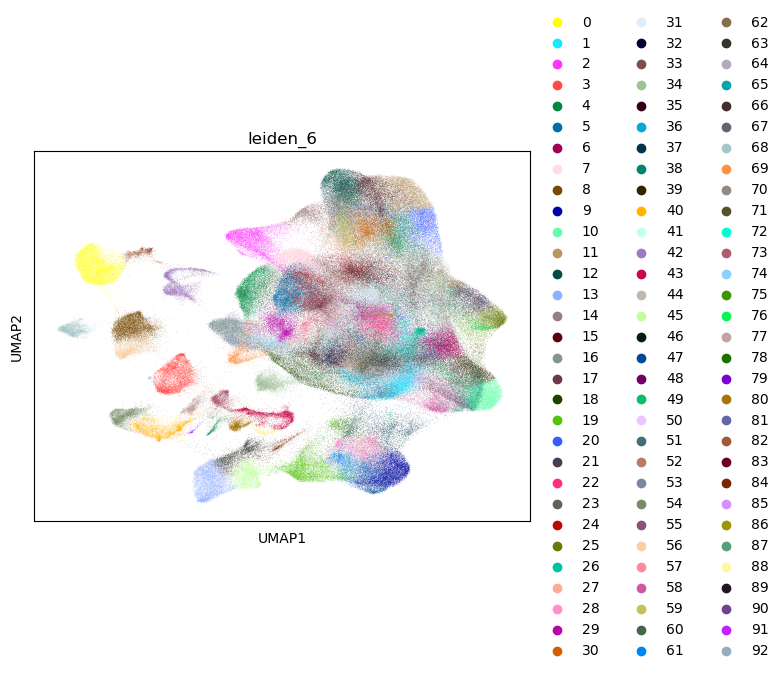

In [40]:
sc.pl.umap(skull, color=['leiden_6'])

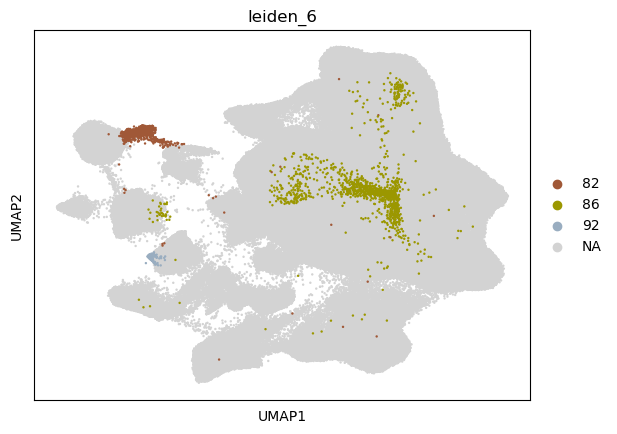

In [58]:
sc.pl.umap(skull, color=['leiden_6'], groups=["92", "82", "86"], size=12)

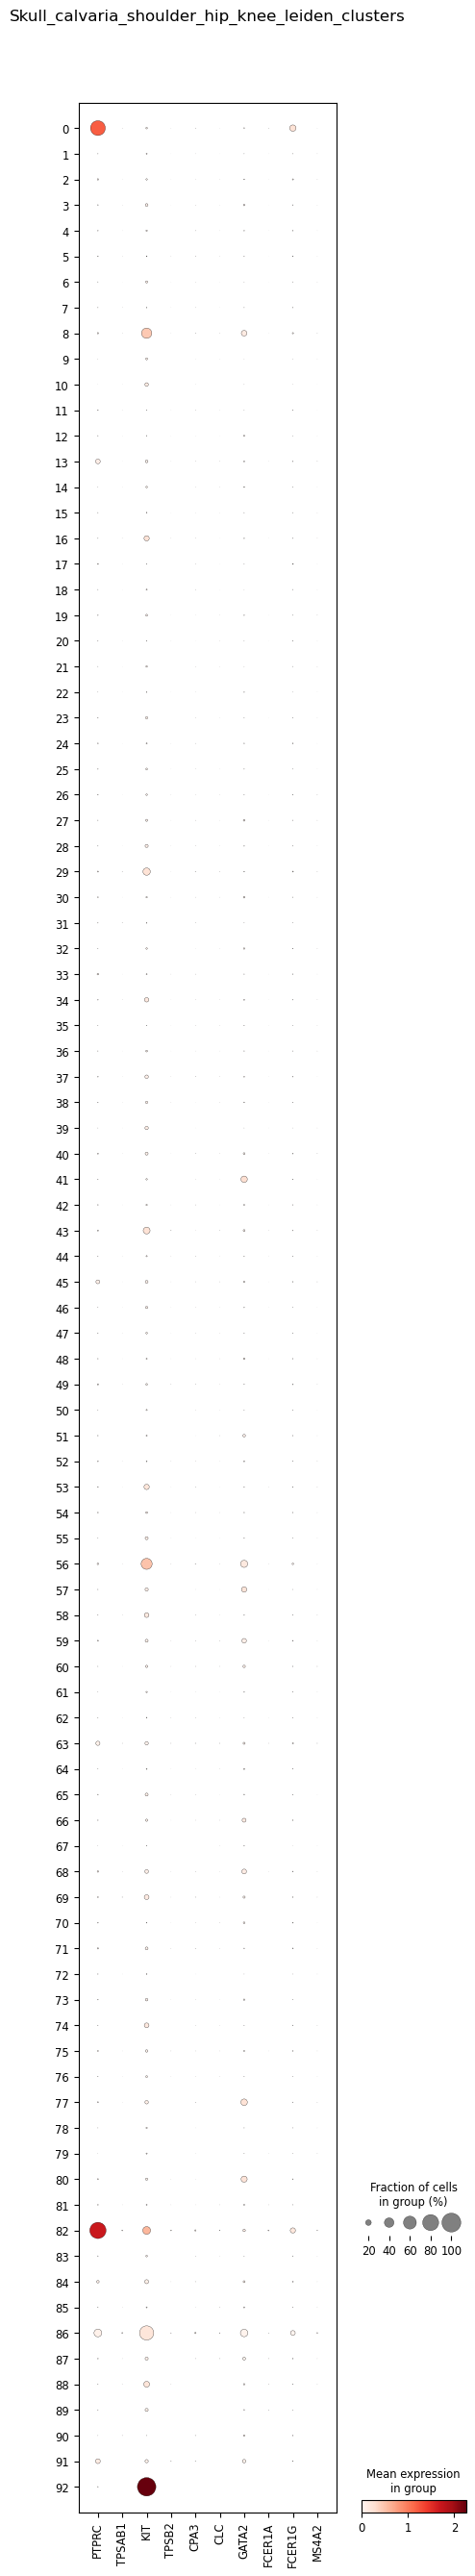

In [55]:
sc.pl.dotplot(skull, ['PTPRC', 'TPSAB1', 'KIT', "TPSB2", "CPA3", "CLC", "GATA2", "FCER1A", "FCER1G", 'MS4A2'], "leiden_6", dendrogram=False, use_raw=False, title="Skull_calvaria_shoulder_hip_knee_leiden_clusters", save= "Skull_calvaria_shoulder_hip_knee_leiden_clusters.png")

In [56]:
pwd

'/home/jovyan/mount/gdrive/Skull'

In [ ]:
hip_knee_immune=hip_knee[hip_knee.obs['compartment'].isin(['Immune', 'Lymphatic'])]

In [ ]:
sc.pl.umap(Immune_Subset, color=['percent_mito','percent_ribo','n_genes' ,'pct_counts_mt','pct_counts_ribo','scrublet_score'])

In [ ]:
sc.pl.umap(hip_knee_immune, color=['percent_mito','percent_ribo','n_genes' ,'pct_counts_mt','pct_counts_ribo','scrublet_score'], save="Immune_Hip_Knee_Ribo_Content.png")

In [ ]:
hip_knee_immune.obs

In [ ]:
hip_knee_immune.obs["pcw"].value_counts()

In [ ]:
hip_knee_immune.obs["batch"].value_counts()

In [ ]:
sc.pl.dotplot(skull, ["CD36"], 'compartment', dendrogram=False)

In [ ]:
progenitor_markers_panfetal = {'HSC_MPP':['CLEC9A','HLF','CD34','SPINK2'],
           'MLP':['BCL11A','IL7R','IL2RG'],
           'B lineage':['CD19','VPREB1','PAX5'],
           'T lineage':['CD3D','BCL11B'],
           'MEMP':['GATA2'],
           'MEP':['KLF1','ITGA2B'],
           'Ery lineage':['HBB','HBG1'],
           'Myeloid lineage':['MPO','CSF1R','CEBPA']
          }
myeloid_markers_panfetal = {'Early Progenitor':["CD34",	"SPINK2",	"MLLT3"],
'Myeloid_progenitor':["PRSS57",	"PRTN3",	"AZU1",],
'Neutrophil lineage':["ELANE",	"DEFA4",	"LCN2",	"LTF",	"ORM1",],
'Monocyte_lineage':["CD52",	"S100A8",	"MS4A6A",	"CD14",	"CXCR4",	"CCR2",	"IL1B",	"CD300E",],
'DC_progenitor':["ACY3",	"TIFAB",	"KIF17",],
'pDC':["CLEC4C",	"JCHAIN",	"IRF7",],
'ASDC':["SIGLEC6",	"AXL",],
'DC2':["CLEC10A",	"CD1C",],
'DC1':["CLEC9A",	"BATF3",],
'MIGRATORY_DC':["CCR7",	"LAMP3",],
'LANGERHANS_CELLS':["IDO1",	"CD1A",],
'EO_BASO_MAST':["CLC",	"KIT",	"TPSAB1",],
'MAC_LYVE1_HIGH':["F13A1",	"LYVE1",	"SPP1"],
 'MAC_IRON_RECYCLING':["CD5L",	"APOE",	"VCAM1",],
 'MAC_PROLIFERATING':["TOP2A",	"MKI67",],
 'MAC_MHCII_HIGH':["HLA-DRA",	"HLA-DPA1",	"CLEC7A",],
 'MAC_KUPFFER_LIKE':["ENG",	"KDR",	"CAV1",],
#'MAC_PERI':["SPP1","OLFML3","CCL3"],
#'MAC_ERY':['HBA1','HBA2','HBG2'],
 'MAC_TREM2':["TREM2",	"P2RY12",],
    'MAC_TLF+':["TIMD4", "FOLR2", 'LYVE1'],
'OSTEOCLAST':["MMP9",	"ACP5",]
          }
b_markers_panfetal = {'lymphoid progenitor':['CD34','SPINK2','IL7R','KIT'],
           'PRE PRO B':['FLT3','CD19','VPREB1'], 
           'PRO B':['MME','CDC45','DHFR','MKI67'], 
           'LATE PRO B':['CD27','RAG1','DNTT','VPREB3'], 
           'PRO -> PRE':['CD24','TNFRSF17'], 
           'PRE -> IMMATURE':['MME','IDH2','SPIB','IL4R'], 
           'MATURE':['MS4A1','CD40','FCER2'], 
           'B1':['CD27','SPN','CCR10'],
           'PLASMA B':['JCHAIN','SDC1','CD38'],
           'CYCLING_B':['MKI67']
          }

MEGA_ERY_markers_panfetal = {"Megakaryocyte Erythroid Precursors":['TESPA1','GATA2','FCER1A'],
"Early_ERY":['KLF1','APOE','FAM178B'],
"Mid_ERY":[ 'BLVRB', 'CD36', 'OAT',],
"Late_ERY":[ 'GYPA', 'GYPB', 'SLC4A1'],
"YS_ERY" : ['HBZ','HBE1'],
"Early_MK":['HBD','PF4'],
"late_MK":['ITGA2B','ITGB3','CLK1'],
"VSMC_PERICYTE_III":['PDGFRA', 'TAGLN','RGS5'],
'MACROPHAGE_ERY':["C1QA","CD163"],
"Proliferating" : ["TOP2A","MKI67"],
          }

In [ ]:
sc.pl.dotplot(skull, ["CD36"], 'anatomical_site', dendrogram=False)

In [ ]:
hip_knee_immune

In [ ]:
sc.pp.filter_cells(hip_knee_immune, min_genes=200)
sc.pp.filter_genes(hip_knee_immune, min_cells=3)

In [ ]:
sc.pl.highly_variable_genes(hip_knee_immune)

In [ ]:
sc.tl.pca(hip_knee_immune, svd_solver='arpack')

sc.pp.neighbors(hip_knee_immune, n_neighbors=10, n_pcs=40)

sc.tl.paga(hip_knee_immune)
sc.pl.paga(hip_knee_immune, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(hip_knee_immune, init_pos='paga')
sc.tl.umap(hip_knee_immune)


In [ ]:

sc.pl.dotplot(hip_knee_immune, ["TPSAB1", "KIT","PTPRC", 'CLU',
'CTSG','PRG2','CTSD','HPGDS','CPA3','GPNMB','VWA5A',
'RGS13','MAOB','HLA-DRA','HLA-DRB1','HLA-DRB5','PRSS57','CNRIP1','GATA2'],'leiden_6', dendrogram=False, use_raw=False)

In [ ]:
sc.pl.dotplot(hip_knee_immune, ['PTPRC', 'TPSAB1', 'KIT', "TPSB2", "CPA3", "CLC", "GATA2", "FCER1A", "FCER1G", 'MS4A2'],'leiden_12', dendrogram=False, use_raw=False)

In [ ]:
sc.pl.umap(hip_knee_immune, color=['PTPRC', 'TPSAB1', 'KIT', "TPSB2", "CPA3", "CLC", "GATA2", "FCER1A", "FCER1G", 'MS4A2'])

In [ ]:
sc.pl.umap(hip_knee_immune, color=['pcw'])

In [ ]:
sc.tl.leiden(hip_knee_immune, resolution=3)

In [ ]:
sc.tl.leiden(hip_knee_immune, resolution=12,  key_added='leiden_12')

In [ ]:
sc.pl.umap(hip_knee_immune, color=['leiden'])

In [ ]:
sc.pl.umap(hip_knee_immune, color=['leiden_6'])

In [ ]:
sc.pl.umap(hip_knee_immune, color=['leiden_12'], groups=["25"])

In [ ]:
hip_knee_immune.obs["leiden"].value_counts()

In [ ]:
hip_knee_immune.obs["leiden_12"].value_counts()

In [ ]:
## Set variables
data = hip_knee_immune
#Section = 'Section_09'
var_col = 'leiden_12'
n_genes_to_calc = 500
n_genes_show_filt = 100
p_use = 'pvals_adj'
date = '20221101'
use_mit_ribo_filt = True

In [ ]:
# OUTPUT ONE - Calculate and save DEGs (DEGs run on normalised and natural logged data (saved as adata.X)) as in Scanpy using wilcoxon rank sum test with benjamini-hochberg correction
# Output is top 500 DEGs ranked by zscore (score underlying the computation of a p-value for each gene for each group) 
sc.tl.rank_genes_groups(data, groupby=var_col, method='wilcoxon', corr_method='benjamini-hochberg', groups='all', reference='rest', n_genes=n_genes_to_calc, use_raw=False, log_transformed=True)
result = data.uns['rank_genes_groups']
groups = result['names'].dtype.names
# Reformat output so easier to understand 
# the resultant df shows the log2 fold change of the ln-transformed data for each gene ordered by z-score 
DE = pd.DataFrame(
    {group + '_' + key: result[key][group]
    for group in groups for key in ['names', 'pvals','pvals_adj','logfoldchanges']}).head(n_genes_to_calc)
# Save output 1 (Default scanpy output as pandas) 
#output_1_name = '/lustre/scratch117/cellgen/team298/Whole_Embryo_ar32_sw33_sm54/sm54_sections/' + 'DEGS_for_' + Section + '_unfiltered_' + var_col + '_' + date + '.csv'
#DE.to_csv(output_1_name)
# OUTPUT TWO - Save DEGs as above with p>0.05 removed, top 100 by pval selected, and ranked by logfc - these are used directly for annotation and are saved as csvs for supplementary tables
# Output is top 100 significant DEGs ranked by logfc 
degs = DE[:]
if 'concat' in locals() or 'concat' in globals():
    del(concat)
n = degs.loc[:, degs.columns.str.endswith("_names")]
n = pd.melt(n)
p = degs.loc[:, degs.columns.str.endswith("_pvals")]
p = pd.melt(p)
p_adj = degs.loc[:, degs.columns.str.endswith("_pvals_adj")]
p_adj = pd.melt(p_adj)
l = degs.loc[:, degs.columns.str.endswith("_logfoldchanges")]
l = pd.melt(l)
n = n.replace(regex=r'_names', value='')
n = n.rename(columns={"variable": "cluster", "value": "gene"})
p = (p.drop(["variable"],axis = 1)).rename(columns={ "value": "p_val"})
p_adj = (p_adj.drop(["variable"],axis = 1)).rename(columns={ "value": "pvals_adj"})
l = (l.drop(["variable"],axis = 1)).rename(columns={ "value": "logfc"})
concat = pd.concat([n,p,p_adj,l],axis=1)
# Preparing DEG output 2 (filtering for mito and ribo)
concat2 = concat.copy()
concat2["cluster"] = concat2["cluster"].astype(str)
concat = concat[~concat["gene"].str.startswith("MT-")]
concat = concat[~concat["gene"].str.startswith("RP11-")]
concat = concat[~concat["gene"].str.startswith("RPS")]
concat["cluster"] = concat["cluster"].astype(str)
marker_df_1 = concat.groupby('cluster').apply(lambda grp: grp.nsmallest(n_genes_show_filt, p_use)).reset_index(drop=True)
marker_df_1 = marker_df_1.groupby('cluster').apply(lambda grp: grp.nlargest(n_genes_show_filt, 'logfc')).reset_index(drop=True)
marker_df_2 = concat2.groupby('cluster').apply(lambda grp: grp.nsmallest(n_genes_show_filt, p_use)).reset_index(drop=True)
marker_df_2 = marker_df_2.groupby('cluster').apply(lambda grp: grp.nlargest(n_genes_show_filt, 'logfc')).reset_index(drop=True)
# Save DEG output 2 - Filtered DEGs by p_use and ranked by logfc
#output_2_name = '/lustre/scratch117/cellgen/team298/Whole_Embryo_ar32_sw33_sm54/sm54_sections/' + 'DEGS_for_' + Section + '_filtered_' + var_col + '_' + date + '.csv'
#marker_df_1.to_csv(output_2_name)

#  OUTPUT THREE - DEGs as above with p>0.05 removed, top 100 by pval selected, and ranked by logfc (difference between this and output two is that mito and ribo genes are removed prior to filtering in output 3)
# Output is top 100 significant DEGs (excluding mitochondrial and ribosomal genes) ranked by logfc 
#output_3_name = '/lustre/scratch117/cellgen/team298/Whole_Embryo_ar32_sw33_sm54/sm54_sections/' + 'DEGS_for_' + Section + '_filtered_with_mito_ribo_removed_' + var_col + '_' + date + '.csv'
#marker_df_2.to_csv(output_3_name)

In [ ]:
marker_df_2[marker_df_2["cluster"]=='25'][:100]

In [ ]:
skull

# Dimensionality Reduction

In [ ]:
skull.obs["pcw"].value_counts()

In [ ]:
skull.obs['compartment'] = skull.obs['compartment'].replace({'RBC': 'Erythrocyte'})
skull.obs['compartment'] = skull.obs['compartment'].replace({'Schwann': 'OPC'})
skull.obs['compartment'] = skull.obs['compartment'].replace({'Skin': 'Neuronal'})


In [ ]:
plt.rcParams["figure.figsize"] = [7,7]

In [ ]:
sc.tl.pca(skull, svd_solver='arpack')

sc.pp.neighbors(skull, n_neighbors=10, n_pcs=40)

sc.tl.paga(skull)
sc.pl.paga(skull, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(skull, init_pos='paga')
sc.tl.umap(skull)


In [ ]:
sc.pl.embedding(skull, 'X_umap', color=[ 'compartment'], wspace=1, size= 22,legend_fontsize=22, title="Major Cell Types")

In [ ]:
sc.pl.embedding(skull, 'X_umap', color=[ 'CD36'], wspace=1, size= 22,legend_fontsize=22, title="Major Cell Types in Skull")

In [ ]:
sc.pl.embedding(skull, 'X_umap', color=[ 'SOX2',"STMN2","SOX10","PDGFRA","PRDM6","CRABP2"], wspace=1, size= 22,legend_fontsize=22)

In [ ]:
skull.obs["anatomical_site"].value_counts()

In [ ]:
sc.pl.embedding(skull, 'X_umap', color=[ "pcw"], wspace=1, size= 22,legend_fontsize=22)

In [ ]:
sc.pl.embedding(skull, 'X_umap', color=[ "anatomical_site"], wspace=1, size= 22,legend_fontsize=22)

In [ ]:
adata= skull.copy()

In [ ]:
cc1 = pd.DataFrame(index =list(skull.obs['pcw'].cat.categories), columns =  list(skull.obs['compartment'].cat.categories)+['total'])

In [ ]:
for age in cc1.index:
    counter = Counter(adata[adata.obs['pcw']==age].obs["compartment"])
    cc1.loc[age,'total']=sum(adata.obs['pcw']==age)
    for cell in cc1.columns[:-1]:
        cc1.loc[age,cell] = counter[cell]
    #cluster_counter.loc['B1%',sample]=counterB1[sample] / counterB[sample]
cc1 = cc1.astype('int64')

In [ ]:
skull.obs["pcw"].value_counts()

In [ ]:
cc1=cc1.drop(['total'], axis=1)

In [ ]:
sm = np.array(np.sum(cc1,axis=1)).reshape(cc1.shape[0],1)
df1=cc1 / sm * 100
df1['ct']=cc1.index

In [ ]:
df1

In [ ]:
sb.set_theme(style='ticks')
fig, ax = plt.subplots(figsize=(4,3))
legend = []

for i in range(8)[::-1]:
    bar = sb.barplot(x='ct',  y=np.sum(df1.iloc[:,0:i+1],axis=1), data=df1, color=sb.color_palette('tab10')[i])
    legend = legend+[mpatches.Patch(color=sb.color_palette()[i], label=df1.columns[i])]
plt.xticks(fontsize=8,rotation=30,horizontalalignment='right')
plt.yticks(fontsize=8)
ax.set_xlabel('age (pcw)')
ax.set_ylabel('Proportion of cells (%)')

# add legend
ax.legend(handles=legend,loc='upper left',bbox_to_anchor=(1.02, 1),frameon=False, fontsize='x-small')

plt.savefig('/home/jovyan/WE_Transcriptomic/Proportion_CellTypes_Skull.png',bbox_inches='tight');

# Immune

In [ ]:
Immune= skull[skull.obs["compartment"]=="Immune"]

In [ ]:
Immune

In [ ]:
Immune_Markers= { 
                                           
                  "ASTRO.":["CX3CR1","VWF","AQP4", "APOE", "SPARCL1"], # APOE and AQP4: Trevino et al., 2021;
                 

                 'Microglia':[ 'TMEM119','P2RY12',"TREM2","AIF1","CCL3"], # AIF1 & CCL3 from Trevino et al., 2021 
   
                  'CAMs': ['MRC1',"CD163", "LYVE1","SIGLEC1","STAB1","MS4A1"], # CNS Associated Macrophages
                 "Macrophage": ["CD4","CD14","C1QA"],
                        
                        "TREM2 Mac.": ["TREM2","CX3CR1","P2RY12"],
    }

In [ ]:
skull

In [ ]:
"CCR10","CD5", "CD27",  "SPN", "DNTT","RAG1","VPREB1"

In [ ]:
sc.pl.dotplot(skull_only, ["IGHM","IGHD","CCR10","CD5", "CD27",  "SPN", "DNTT","RAG1","VPREB1"], 'compartment', dendrogram=False)

In [ ]:
sc.pl.dotplot(skull_only, ["IGHM","IGHD","CCR10","CD5", "CD27",  "SPN", "DNTT","RAG1","VPREB1"], 'pcw', dendrogram=False)

In [ ]:
sc.pl.dotplot(Immune, ["PTPRC","CD163",  "MRC1", "LYVE1","CD34", "CD14", "LYZ", "CD68"], 'pcw', dendrogram=False)

In [ ]:
sc.pl.dotplot(Immune, Immune_Markers, 'pcw', dendrogram=False, use_raw=False)

In [ ]:
Immune

In [ ]:
sc.pl.dotplot(full_adata_skull_only, Immune_Markers, 'compartment', dendrogram=False, use_raw=False)

# Immune Markers

In [ ]:
progenitor_markers_panfetal = {'HSC_MPP':['CLEC9A','HLF','CD34','SPINK2'],
           'MLP':['BCL11A','IL7R','IL2RG'],
           'B lineage':['CD19','VPREB1','PAX5'],
           'T lineage':['CD3D','BCL11B'],
           'MEMP':['GATA2'],
           'MEP':['KLF1','ITGA2B'],
           'Ery lineage':['HBB','HBG1'],
           'Myeloid lineage':['MPO','CSF1R','CEBPA']
          }
myeloid_markers_panfetal = {'Early Progenitor':["CD34",	"SPINK2",	"MLLT3"],
'Myeloid_progenitor':["PRSS57",	"PRTN3",	"AZU1",],
'Neutrophil lineage':["ELANE",	"DEFA4",	"LCN2",	"LTF",	"ORM1",],
'Monocyte_lineage':["CD52",	"S100A8",	"MS4A6A",	"CD14",	"CXCR4",	"CCR2",	"IL1B",	"CD300E",],
'DC_progenitor':["ACY3",	"TIFAB",	"KIF17",],
'pDC':["CLEC4C",	"JCHAIN",	"IRF7",],
'ASDC':["SIGLEC6",	"AXL",],
'DC2':["CLEC10A",	"CD1C",],
'DC1':["CLEC9A",	"BATF3",],
'MIGRATORY_DC':["CCR7",	"LAMP3",],
'LANGERHANS_CELLS':["IDO1","CD207",	"CD1A",],
'EO_BASO_MAST':["CLC",	"KIT",	"TPSAB1",],
'MAC_LYVE1_HIGH':["F13A1",	"LYVE1",	"SPP1"],
 'MAC_IRON_RECYCLING':["CD5L",	"APOE",	"VCAM1",],
 'MAC_PROLIFERATING':["TOP2A",	"MKI67",],
 'MAC_MHCII_HIGH':["HLA-DRA",	"HLA-DPA1",	"CLEC7A",],
 'MAC_KUPFFER_LIKE':["ENG",	"KDR",	"CAV1",],
#'MAC_PERI':["SPP1","OLFML3","CCL3"],
#'MAC_ERY':['HBA1','HBA2','HBG2'],
 'MAC_TREM2':["TREM2",	"P2RY12",],
    'MAC_TLF+':["TIMD4", "FOLR2", 'LYVE1'],
'OSTEOCLAST':["MMP9",	"ACP5",]
          }
b_markers_panfetal = {'lymphoid progenitor':['CD34','SPINK2','IL7R','KIT'],
           'PRE PRO B':['FLT3','CD19','VPREB1'], 
           'PRO B':['MME','CDC45','DHFR','MKI67'], 
           'LATE PRO B':['CD27','RAG1','DNTT','VPREB3'], 
           'PRO -> PRE':['CD24','TNFRSF17'], 
           'PRE -> IMMATURE':['MME','IDH2','SPIB','IL4R','IGHM'], 
           'MATURE':['IGHD','MS4A1','CD40','FCER2'], 
           'B1':['CD27','SPN','CCR10'],
           'PLASMA B':['JCHAIN','SDC1','CD38'],
           'CYCLING_B':['MKI67']
          }


In [ ]:
Main_Markers_All_Celltypes= { 
                                           
                        "Neuron (broad)": ["DCX", "ELAVL3","MAP2","STMN2", "RBFOX3",'TUBB2B','STMN4', 'SNAP25','BCL11B', "INA" ],
    
                     
                       
                        "Neuroblast": ["NHLH1", "NRXN3", "NHLH2", "NEUROD6","NEUROG2", "NEUROD1", "NEUROD4",'ASCL1', 'OLIG2', 'PDGFRA', 'EGFR'], # Manno et al., 2016; Braun et al., 2022 
                        
                       
                       
                   "NEURON_INH.": ["GAD1","GAD2","ADARB2","PVALB","SST","RELN","SNCG","LAMP5","PAX6","CCK"], # Also DLX genes; DLX2: GABAergic neurons Trevino et al., 2021 
                 
                 
                 "NEURON_EXC.":["VIP","SLC17A6","SLC17A7","LINC00507","RORB","FEZF2","THEMIS", "EMX1"], # EMX1 Excitatory linaege, Linnarson
                 
   
    
    
    
    
                        
                "Radial Glia": ["HES2","NES", "SOX2","SOX10"],
                        
                 
                 "OLIGODENDROCYTE/OPC":["MOBP","PDGFRA",'SOX10', 'NKX2-2', 'MBP',"PCDH15","APOD", "OLIG2", "OLIG1" ], # Trevino et al., 2021 :'SOX10', 'NKX2-2', 'MBP'; PDGFRA and OLIG2: OPC Tervino et al., 2022; # OLIG1: Braun et al., 2022
                
               
                 
                 
                 
                
                 
                 

                 'Microglia':[ 'TMEM119','P2RY12',"TREM2","AIF1","CCL3"], # AIF1 & CCL3 from Trevino et al., 2021 
    "ASTRO.":["CX3CR1","VWF","AQP4", "APOE", "SPARCL1"], # APOE and AQP4: Trevino et al., 2021;
                  'CAMs': ['MRC1',"CD163", "LYVE1","SIGLEC1","STAB1","MS4A1"], # CNS Associated Macrophages
                 "Macrophage": ["CD4","CD14","C1QA"],
                        
                        "TREM2 Mac.": ["TREM2","CX3CR1","P2RY12"],
    
                        
                        "Endothial(LYVE1+)": ["LYVE1","PECAM1","KDR","CD34","CLDN5"],
                        
                        "Endothelial(PVLAP+)": ["PLVAP","ESAM","IL33","CD34"],
             'LEC': ["PROX1","FLT4", "PDPN", 'LYVE1'], # Lymphatic endothelial cell; Jafree et al., 2021 
    
    
                        
                        "Fibroblast": ["PDGFRA","THY1","VCAN", "LUM"]}

In [ ]:
import matplotlib

In [ ]:
matplotlib.rcdefaults()

In [ ]:
MEGA_ERY_markers_panfetal = {"Megakaryocyte Erythroid Precursors":['TESPA1','GATA2','FCER1A'],
"Early_ERY":['KLF1','APOE','FAM178B'],
"Mid_ERY":[ 'BLVRB', 'CD36', 'OAT',],
"Late_ERY":[ 'GYPA', 'GYPB', 'SLC4A1'],
"YS_ERY" : ['HBZ','HBE1'],
"Early_MK":['HBD','PF4'],
"late_MK":['ITGA2B','ITGB3','CLK1'],
"VSMC_PERICYTE_III":['PDGFRA', 'TAGLN','RGS5'],
'MACROPHAGE_ERY':["C1QA","CD163"],
"Proliferating" : ["TOP2A","MKI67"],
          }

In [ ]:
sc.pl.dotplot(full_adata_skull_only, myeloid_markers_panfetal, 'compartment', dendrogram=False, use_raw=False)

In [ ]:
sc.pl.dotplot(skull, b_markers_panfetal, 'compartment', dendrogram=False, use_raw=False)

In [ ]:
sc.pl.dotplot(skull, MEGA_ERY_markers_panfetal, 'compartment', dendrogram=False, use_raw=False)

In [ ]:
sc.pl.dotplot(skull, progenitor_markers_panfetal, 'compartment', dendrogram=False, use_raw=False)

In [ ]:
sc.pl.dotplot(skull, Main_Markers_All_Celltypes, 'compartment', dendrogram=False, use_raw=False)

In [ ]:
sc.pl.dotplot(Immune, b_markers_panfetal, 'pcw', dendrogram=False, use_raw=False)

In [ ]:
b_markers_panfetal

In [ ]:
sc.pl.dotplot(Immune, progenitor_markers_panfetal, 'pcw', dendrogram=False, use_raw=False)

In [ ]:
sc.pl.dotplot(Immune, ["CD19","CXCL12", "CD79A","MS4A1","IL7R","CXCR4","SDC1"], 'pcw', dendrogram=False, use_raw=False)

In [ ]:
sc.pl.dotplot(Immune, myeloid_markers_panfetal, 'pcw', dendrogram=False, use_raw=False)

# Subclustering of immune cells

In [ ]:
Immune

In [ ]:
Immune_Markers_Combined= { 
    'Ery lineage':['HBB','HBG1'],
           'Myeloid lineage':['MPO','CSF1R','CEBPA'],
    'Monocyte_lineage':["CD52",	"S100A8",	"MS4A6A",	"CD14",	"CXCR4",	"CCR2",	"IL1B",	"CD300E",],
    
    'LATE PRO B':['CD27','RAG1','DNTT','VPREB3'], 

    'PRE -> IMMATURE':['MME','IDH2','SPIB','IL4R','IGHM'], 
    
    
    'PRO B':['MME','CDC45','DHFR','MKI67',"CXCR4"],
    
     "Mid_ERY":[ 'BLVRB', 'CD36', 'OAT',],
                                           
                  "ASTRO.":["CX3CR1","VWF","AQP4", "APOE", "SPARCL1"], # APOE and AQP4: Trevino et al., 2021;
                 

                 'Microglia':[ 'TMEM119','P2RY12',"TREM2","AIF1","CCL3"], # AIF1 & CCL3 from Trevino et al., 2021 
   
                  'CAMs': ['MRC1',"CD163", "LYVE1","SIGLEC1","STAB1","MS4A1"], # CNS Associated Macrophages
                 "Macrophage": ["CD4","CD14","C1QA"],
                        
                        "TREM2 Mac.": ["TREM2","CX3CR1"],
    "Plasma":["SDC1", "CD38"]
    
    
    }

In [ ]:
sc.set_figure_params(scanpy=True, fontsize=16)

In [ ]:
sc.pl.dotplot(Immune, ["CD79A","MS4A1","IL7R","CXCR4", "CR2"], 'pcw', dendrogram=False, use_raw=False, save= "Skull_Immune_Markers.png" )

In [ ]:
Immune.obs["pcw"].value_counts()

In [ ]:
pwd

In [ ]:
sc.pl.dotplot(Immune, Immune_Markers_Combined, 'pcw', dendrogram=False, use_raw=False, save= "Skull_Immune_Dotplot_Ages.png")

In [ ]:
sc.pl.dotplot(skull, Immune_Markers_Combined, 'compartment', dendrogram=False, use_raw=False, save= "Skull_Immune_Dotplot_Ages.png")

In [ ]:
myeloid_markers_panfetal

In [ ]:
sc.pl.dotplot(Immune, M, 'pcw', dendrogram=False, use_raw=False)

In [ ]:
plt.rcParams["figure.figsize"] = [20,20]

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 40}

In [ ]:
sc.settings.set_figure_params(dpi = 160, color_map = 'RdYlBu_r', dpi_save = 300, format = 'png')
plt.rcParams["figure.figsize"] = [20,20]

In [ ]:
sc.pl.dotplot(full_adata_skull_only, Main_Markers_All_Celltypes, 'compartment', dendrogram=False, use_raw=False)

In [ ]:
full_adata_skull_only

In [ ]:
Immune_Subset= Immune.copy()

In [ ]:

sc.pp.normalize_total(Immune_Subset, target_sum=1e4)
sc.pp.log1p(Immune_Subset)
#sc.pp.highly_variable_genes(adata_copy, min_mean=0.0125, max_mean=3, min_disp=0.5, subset=True)
sc.pp.scale(Immune_Subset, zero_center=False)
sc.pp.pca(Immune_Subset, svd_solver='arpack', zero_center=False)
sc.pp.neighbors(Immune_Subset, n_pcs=30)
sc.tl.umap(Immune_Subset)
sc.tl.leiden(Immune_Subset, resolution=.5)

In [ ]:
sc.pl.embedding(Immune_Subset, "X_umap", color=[ "pcw"], wspace=0.25, size= 12)

In [ ]:
sc.pl.embedding(Immune_Subset, "X_umap", color=[ "NES","SOX10", "CD4", "PTPRC", "LYZ", "CSF1R", "MS4A6A"], wspace=0.25, size= 12)

In [ ]:
sc.pl.embedding(skull_only, "X_umap", color=[ "HBG1", "CD14", "SOX2", "STMN2", "NHLH1", "TPSB2",
                                                         "CYP1B1", "PECAM1"], wspace=0.25, size= 12)

In [ ]:
sc.pl.umap(Immune_Subset, color=['PTPRC', 'TPSAB1', 'KIT', "TPSB2", "CPA3", "CLC", "GATA2", "FCER1A", "FCER1G", 'MS4A2'])

In [ ]:
hip_knee_immune.obs["pcw"].value_counts()

In [ ]:
sc.pl.umap(hip_knee_immune, color=['PTPRC', 'TPSAB1', 'KIT', "TPSB2", "CPA3", "CLC", "GATA2", "FCER1A", "FCER1G", 'MS4A2'], title= "Expression of Mast Cell Markers in Hip and Knee Joint Immune Cells ", save= "Immune_Hip_Knee.png")

In [ ]:
pwd

In [ ]:
 sc.pp.log1p(skull_only)

#adata = adata[:, adata.var['highly_variable']].copy()  #slicing of anndata object needs copy 
# scale the data with scanpy.pp.scale with zero_center= TRUE or false; after scaling anndata     
#becomes a dense object 
#save layers of data: anndata.layers (save different versions of the matrix)

In [ ]:
skull_only.X

In [ ]:
sc.tl.pca(skull_only, svd_solver='arpack')


In [ ]:
skull_immune= skull_only[skull_only.obs['compartment']=='Immune'].copy()

In [ ]:
skull_immune.obs["pcw"].value_counts()

In [ ]:
skull_pcw6=  skull_only[skull_only.obs['pcw']=='5.8'].copy()

In [ ]:
sc.pl.embedding(skull_pcw6, 'X_umap', color=[ 'compartment'], wspace=1, size= 4)

In [ ]:
skull_pcw6.obs["compartment"].value_counts()

In [ ]:
skull_pcw7=  skull_only[skull_only.obs['pcw']=='7.6'].copy()

In [ ]:
sc.pl.embedding(skull_pcw7, 'X_umap', color=[ 'compartment'], wspace=1, size= 4)

In [ ]:
skull_pcw7.obs["compartment"].value_counts()

In [ ]:
skull_pcw8=  skull_only[skull_only.obs['pcw']=='8.5'].copy()

In [ ]:
sc.pl.embedding(skull_pcw8, 'X_umap', color=[ 'compartment'], wspace=1, size= 4)

In [ ]:
skull_pcw8.obs["compartment"].value_counts()

In [ ]:
skull_pcw9=  skull_only[skull_only.obs['pcw']=='9.4'].copy()

In [ ]:
sc.pl.embedding(skull_pcw9, 'X_umap', color=[ 'compartment'], wspace=1, size= 4)

In [ ]:
skull_pcw9.obs["compartment"].value_counts()

In [ ]:
markers = {'MATURE_T':['CD4'], 
           #'agonist selection':['TNFRSF9','CD27','IKZF2','IKZF3'],
          
           'innate':['ZBTB16'],
           'CD8aa':['GNG4'], 
           'TYPE_3_INNATE_T':['ANXA1'],
           'TYPE_1_INNATE_T':[
                              'IFNG-AS1']
          }
sc.pl.dotplot(skull_pcw6, markers, 'compartment', dendrogram=False, use_raw=False)

In [ ]:
sc.pl.dotplot(skull_pcw6, markers, 'compartment', dendrogram=False, use_raw=False)

In [ ]:
sc.pl.embedding(skull_pcw6, 'X_umap', color=[ 'compartment'], wspace=1, size= 4)

In [ ]:
sc.pl.embedding(skull, 'X_umap', color=[ 'STAT1', 'IFNG-AS1'], wspace=1, size= 4)

In [ ]:
sc.pl.violin(skull_only, ["CD4", 'IFNG-AS1'], groupby="compartment", rotation=90)



In [ ]:
sc.pl.violin(skull_pcw6, ["CD4", 'IFNG-AS1'], groupby="compartment", rotation=90)



In [ ]:
sc.pl.violin(skull_pcw7, ["CD4", 'IFNG-AS1'], groupby="compartment", rotation=90)



In [ ]:
sc.pl.violin(skull_pcw8, ["CD4", 'IFNG-AS1'], groupby="compartment", rotation=90)



In [ ]:
sc.pl.violin(skull_pcw9, ["CD4", 'IFNG-AS1'], groupby="compartment", rotation=90)



In [ ]:
'ZBTB16'

In [ ]:
sc.pl.violin(skull_pcw6, ["ZBTB16"], groupby="compartment", rotation=90)



In [ ]:
sc.pl.violin(skull_pcw7, ["ZBTB16"], groupby="compartment", rotation=90)



In [ ]:
sc.pl.violin(skull_pcw8, ["ZBTB16"], groupby="compartment", rotation=90)



In [ ]:
sc.pl.violin(skull_pcw9, ["ZBTB16", 'IFNG-AS1'], groupby="compartment", rotation=90)



In [ ]:
sc.pl.violin(skull, ['IFNG-AS1'], groupby="compartment", rotation=90)

